<a href="https://colab.research.google.com/github/MuhammedAshraf2020/Yolo-v3-Darknet-Custom-Data/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
!mkdir data

In [7]:
cp /content/drive/MyDrive/test.rar /content

In [24]:
!cp /content/drive/MyDrive/hotdog.rar /contnet

In [ ]:
!unrar x hotdog.rar /content/data

In [ ]:
!unrar x test.rar /content/data

In [ ]:
import shutil
import os

data_test_path = "/content/data/test"
target = "/content/data/train"
for f in os.listdir(data_test_path):
  path = data_test_path + "/" + f
  shutil.copy2(path , target)

In [43]:
len(os.listdir("/content/data/train"))

933

#Step2 : Load Darknet

In [39]:
!git clone https://github.com/AlexeyAB/darknet 

Cloning into 'darknet'...
remote: Enumerating objects: 15232, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 15232 (delta 21), reused 33 (delta 20), pack-reused 15185
Receiving objects: 100% (15232/15232), 13.66 MiB | 23.08 MiB/s, done.
Resolving deltas: 100% (10331/10331), done.


In [40]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!make

In [45]:
cp -r /content/data/train /content/darknet/data

In [47]:
!python generate_txt.py

#Step3: Load PreTrained Weights

In [48]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-07-14 06:27:12--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-07-14 06:27:12--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  41.6MB/s    in 4.2s    

2021-07-14 06:27:16 (37.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



#Train

In [ ]:
!./darknet detector train data/objects.data cfg/costum.cfg darknet53.conv.74 -dont_show

In [91]:
cd darknet/

/content/darknet


In [50]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [53]:
len(os.listdir("/content/darknet/backup"))

0

In [81]:
cd darknet/

/content/darknet


In [ ]:
#!./darknet detector train data/object.data cfg/costum.cfg /drive/MyDrive/backup/yolov3_custom_last.weights -dont_show

In [93]:
%cd cfg
!sed -i 's/batch=64/batch=1/' costum.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' costum.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [112]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/objects.data cfg/costum.cfg /content/drive/MyDrive/backup/costum_last.weights /content/765.jpg -thresh 0.3

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

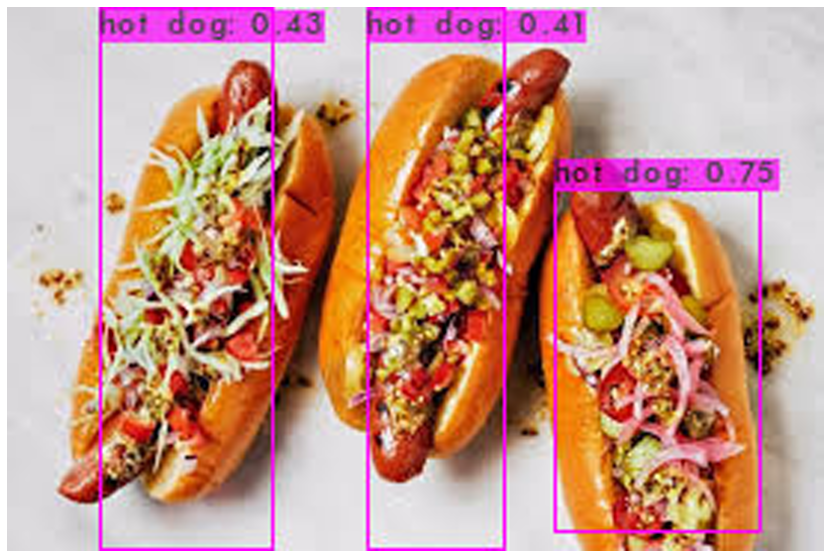

In [113]:
imShow("predictions.jpg")